In [18]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
#Question 1
path2 = kagglehub.dataset_download("sakshigoyal7/credit-card-customers")
path = path2
print("Path to dataset files:", path)
print("Files in dataset path:", os.listdir(path))

data = pd.read_csv(os.path.join(path, "BankChurners.csv"))

100%|██████████| 379k/379k [00:00<00:00, 88.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sakshigoyal7/credit-card-customers/versions/1
Files in dataset path: ['BankChurners.csv']


In [ ]:
print(data)
print(data.head())
print(data.describe())

       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0    

In [ ]:
#number of features
num_features = data.shape[1]
print("Number of features in the dataset:", num_features)
features = data.columns.tolist()
print("List of features in the dataset:", features)
for i in range(len(features)):
    print(features[i])

Number of features in the dataset: 23
List of features in the dataset: ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
CLIENTNUM
Attrition_Flag
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Ope

In [ ]:
# Number of Samples
num_samples = data.shape[0]
print("Number of samples in the dataset:", num_samples)

Number of samples in the dataset: 10127


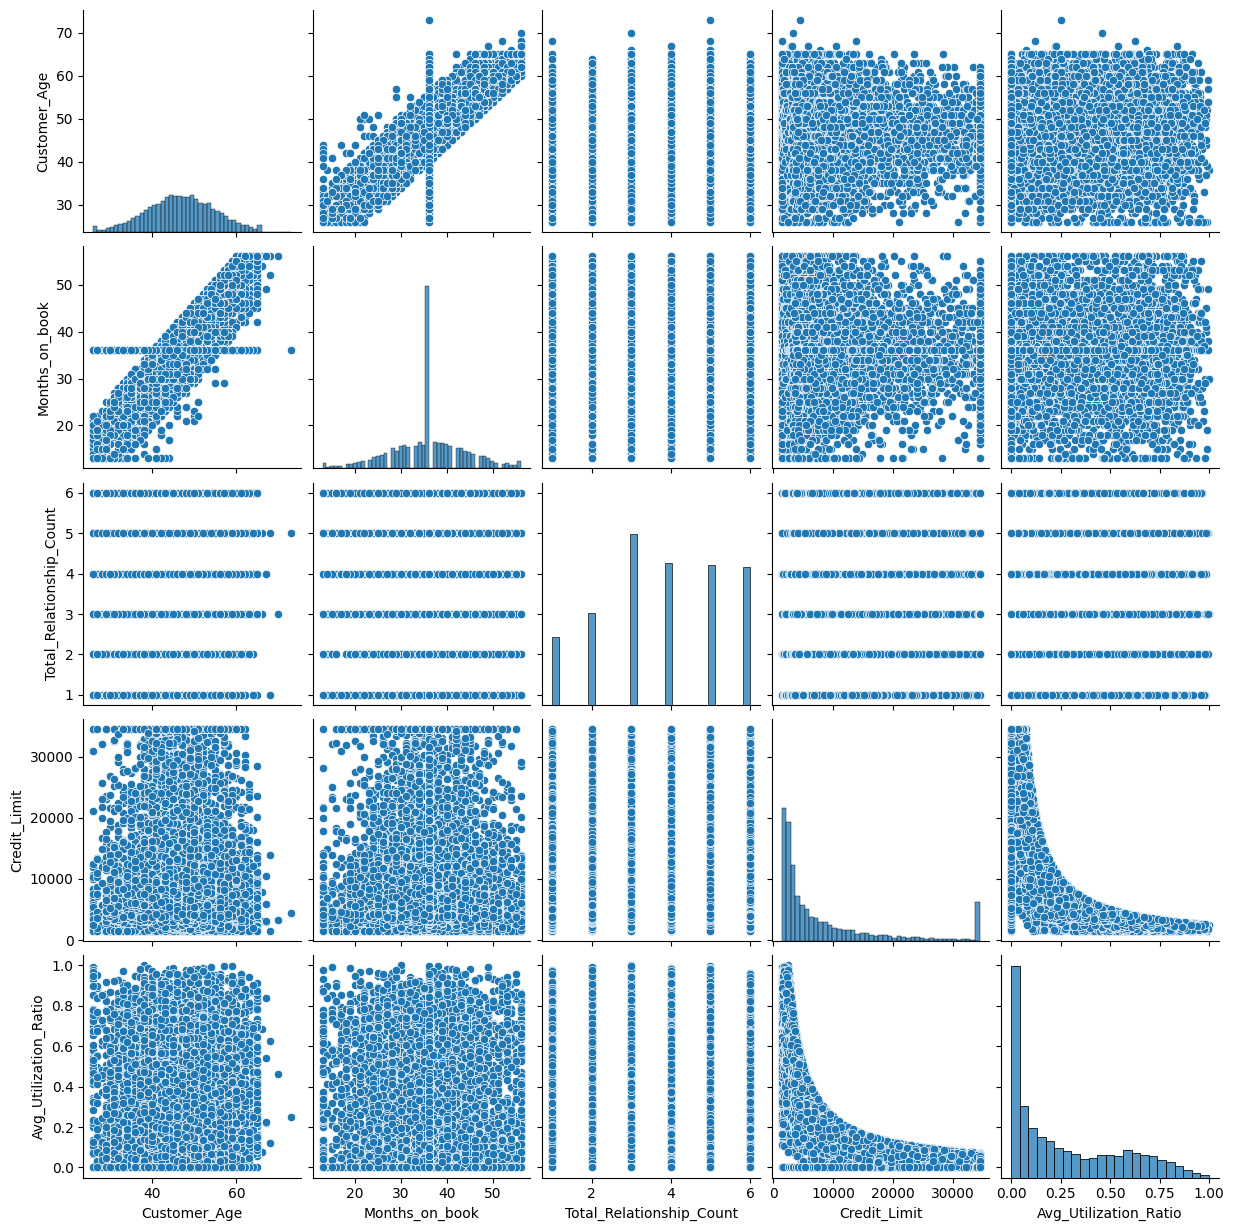

In [ ]:
plt.ion()
selected_features = data[['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Credit_Limit', 'Avg_Utilization_Ratio']]
sns.pairplot(selected_features)
plt.show(block=True)

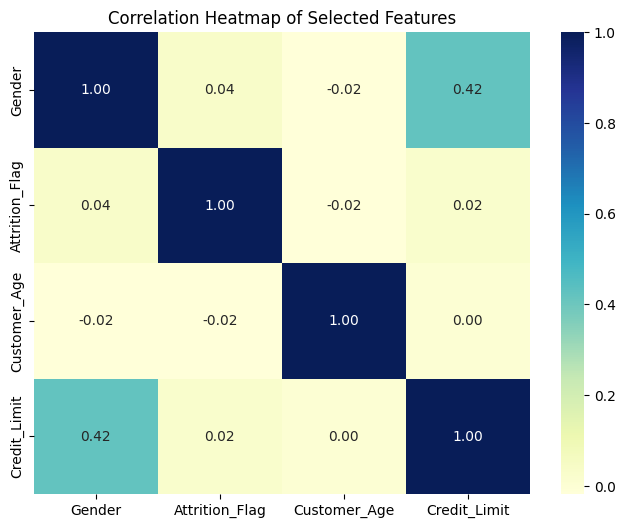

In [ ]:
#Question 3.1
data_encoded = data.copy()
data_encoded['Gender'] = data_encoded['Gender'].apply(lambda x: 1 if x == 'M' else 0)
data_encoded['Attrition_Flag'] = data_encoded['Attrition_Flag'].apply(lambda x: 1 if x == 'Existing Customer' else 0)

selected_features = data_encoded[['Gender', 'Attrition_Flag', 'Customer_Age', 'Credit_Limit']]

correlation_matrix = selected_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.show()

In [ ]:
#Question4
print("Number of NaN values in each column before dropping:")
print(data.isna().sum())
data_cleaned = data.dropna()
print("\nNumber of NaN values in each column after dropping:")
print(data_cleaned.isna().sum())
print("\nShape of the dataset after removing NaN values:", data_cleaned.shape)

Number of NaN values in each column before dropping:
CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                     

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Step 1: Encode categorical variables (if any)
from sklearn.preprocessing import LabelEncoder

categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Step 2: Split the dataset into features and target
X = data.drop(columns=['Attrition_Flag','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])  # Features
y = data['Attrition_Flag']  # Target

# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

# Step 4: Train the Random Forest model
classifier = RandomForestClassifier(random_state=73, max_depth=5, n_estimators=100)
classifier.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = classifier.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[ 163  156]
 [  21 1686]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.51      0.65       319
           1       0.92      0.99      0.95      1707

    accuracy                           0.91      2026
   macro avg       0.90      0.75      0.80      2026
weighted avg       0.91      0.91      0.90      2026



In [ ]:
#balancing the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
# Step 1: Encode categorical variables (if any)
from sklearn.preprocessing import LabelEncoder

categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Step 2: Split the dataset into features and target
X = data.drop(columns=['Attrition_Flag','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])  # Features
y = data['Attrition_Flag']  # Target

# Step 3: Check class imbalance
print("Class Distribution Before Balancing:")
print(y.value_counts())

# Step 4: Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after balancing
print("\nClass Distribution After Balancing:")
print(pd.Series(y_resampled).value_counts())

# Step 5: Split the balanced data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Train the Random Forest model
classifier = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100)
classifier.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = classifier.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Class Distribution Before Balancing:
Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64

Class Distribution After Balancing:
Attrition_Flag
1    8500
0    8500
Name: count, dtype: int64

Confusion Matrix:
[[1594  130]
 [ 169 1507]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1724
           1       0.92      0.90      0.91      1676

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



Class Distribution Before Balancing:
Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64


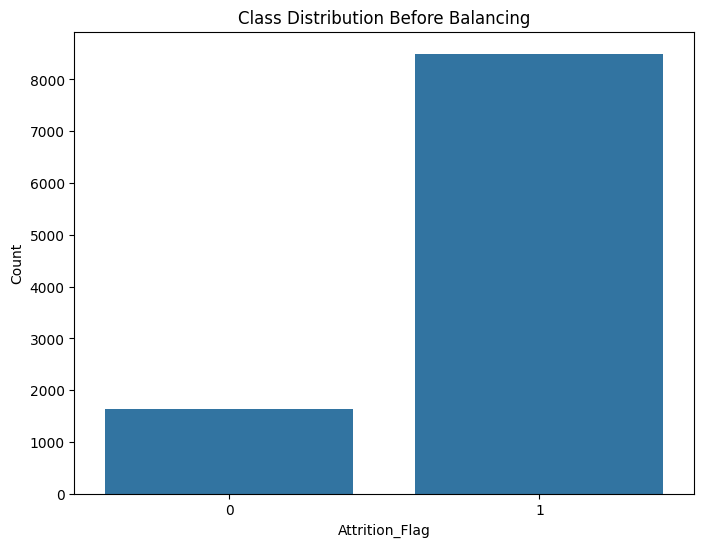


Class Distribution After Balancing:
Attrition_Flag
1    8500
0    8500
Name: count, dtype: int64


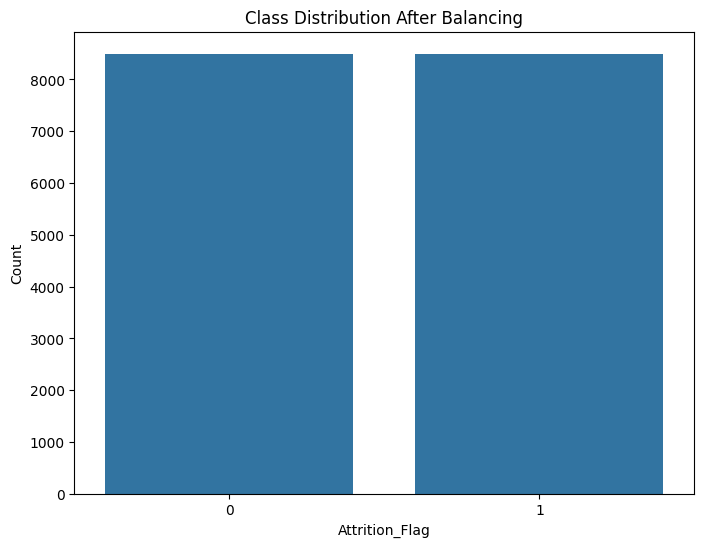


Confusion Matrix:
[[1594  130]
 [ 169 1507]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1724
           1       0.92      0.90      0.91      1676

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # For data balancing

# Step 1: Encode categorical variables (if any)
from sklearn.preprocessing import LabelEncoder

categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Step 2: Split the dataset into features and target
X = data.drop(columns=['Attrition_Flag','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])  # Features
y = data['Attrition_Flag']  # Target

# Step 3: Check and visualize class imbalance
print("Class Distribution Before Balancing:")
print(y.value_counts())

# Visualize class distribution before balancing
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Class Distribution Before Balancing")
plt.xlabel("Attrition_Flag")
plt.ylabel("Count")
plt.show()

# Step 4: Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check and visualize class distribution after balancing
print("\nClass Distribution After Balancing:")
print(pd.Series(y_resampled).value_counts())

# Visualize class distribution after balancing
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title("Class Distribution After Balancing")
plt.xlabel("Attrition_Flag")
plt.ylabel("Count")
plt.show()

# Step 5: Split the balanced data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Train the Random Forest model
classifier = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100)
classifier.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = classifier.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Without Resampling:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       325
           1       0.97      0.98      0.98      1701

    accuracy                           0.96      2026
   macro avg       0.94      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026

Confusion Matrix:
[[ 275   50]
 [  26 1675]]


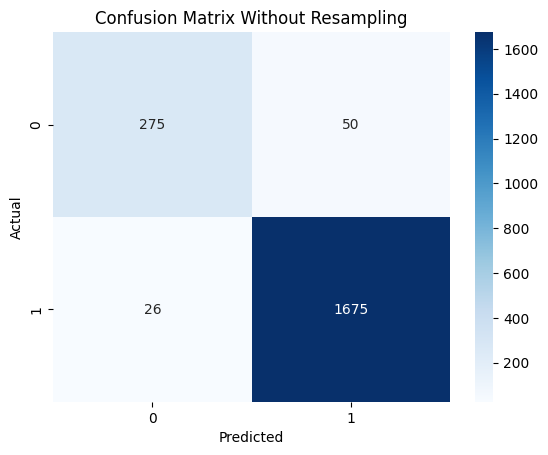

With Resampling (SMOTE):
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       325
           1       0.98      0.96      0.97      1701

    accuracy                           0.95      2026
   macro avg       0.90      0.93      0.92      2026
weighted avg       0.96      0.95      0.95      2026

Confusion Matrix:
[[ 294   31]
 [  62 1639]]


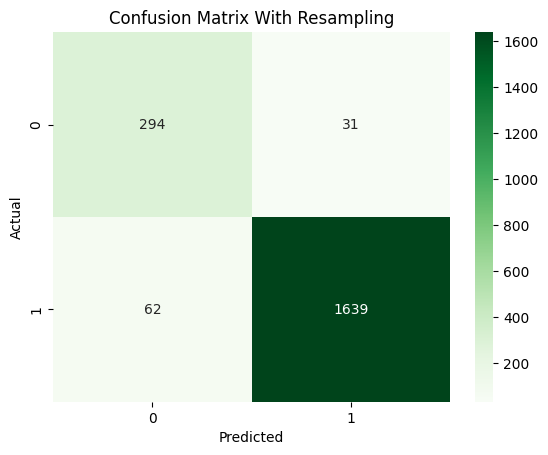

In [23]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


target_column = 'Attrition_Flag'

# Encode categorical features in X
X = data.drop(columns=['Attrition_Flag','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])  # Features
y = data[target_column]

# Encode categorical features
X_encoded = X.copy()
for column in X_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X_encoded[column])

# Encode the target variable if it contains strings
if y.dtype == 'object' or y.dtype.name == 'category':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Step 1: Train a model without handling class imbalance
clf = RandomForestClassifier(random_state=73)
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)

print("Without Resampling:")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Without Resampling")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 2: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a new model with resampled data
clf_resampled = RandomForestClassifier(random_state=73)
clf_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate the resampled model
y_pred_resampled = clf_resampled.predict(X_test)

print("With Resampling (SMOTE):")
print("Classification Report:")
print(classification_report(y_test, y_pred_resampled))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_resampled))

# Visualize the confusion matrix for the resampled model
sns.heatmap(confusion_matrix(y_test, y_pred_resampled), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix With Resampling")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Question 2

importing the dataset from google drive using gdown command

In [4]:
!gdown --id 1PeQVXfT-aYBH0V1mn7ovo6yp3fq7WjdK


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PeQVXfT-aYBH0V1mn7ovo6yp3fq7WjdK
To: /content/data.npy
100% 928/928 [00:00<00:00, 3.04MB/s]


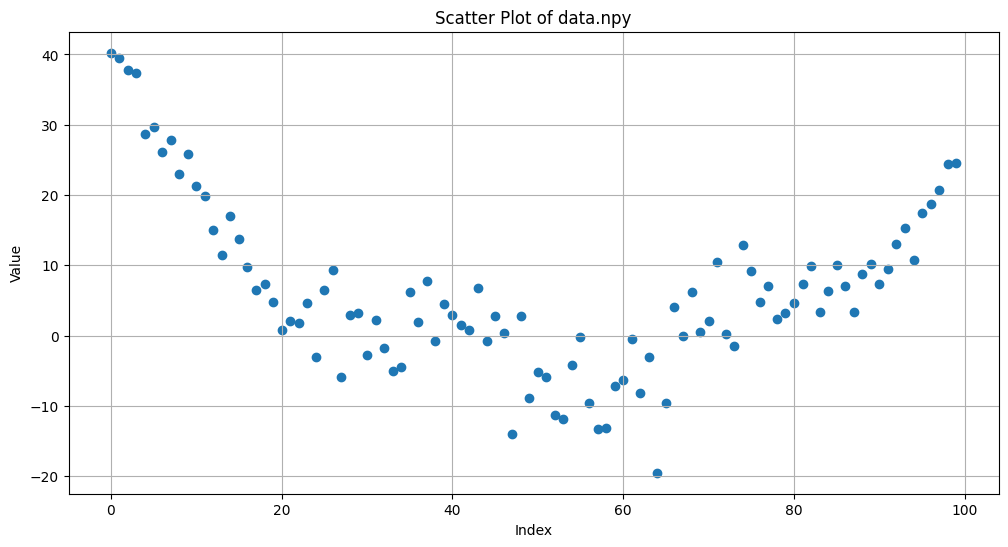

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('data.npy')

x = np.arange(len(data))

# Plotting the scatter graph
plt.figure(figsize=(12, 6))
plt.scatter(x, data, marker='o')
plt.title('Scatter Plot of data.npy')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


1.2

splitting the dataset into training and test sections

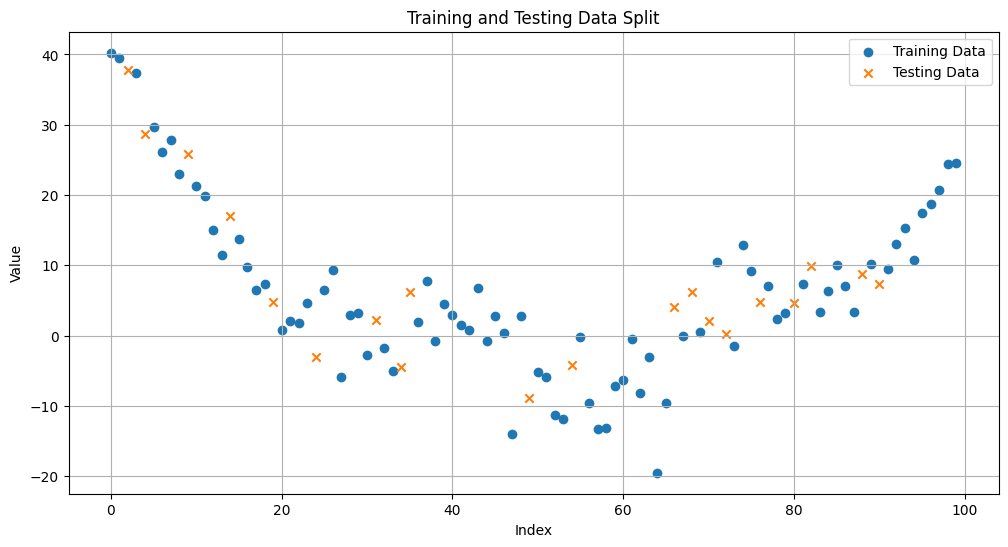

In [12]:
from sklearn.model_selection import train_test_split
indices = np.arange(len(data))
indices_train, indices_test, data_train, data_test = train_test_split(
    indices, data, test_size=0.2, random_state=73
)
plt.figure(figsize=(12, 6))
plt.scatter(indices_train, data_train, label='Training Data', marker='o')
plt.scatter(indices_test, data_test, label='Testing Data', marker='x')
plt.title('Training and Testing Data Split')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

2.2 is answered in the **report file**

The summerized answer is **MAE, MSE and R^2**

2.3

Manual Linear Regression Implementation

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = np.load('data.npy')

# Reshape data for consistency
X_train = indices_train.reshape(-1, 1)
X_test = indices_test.reshape(-1, 1)
y_train = data_train
y_test = data_test

# Step 1: Manual Linear Regression (Least Squares Method)
# Calculate the coefficients manually
x_mean = np.mean(X_train)
y_mean = np.mean(y_train)

numerator = np.sum((X_train - x_mean) * (y_train.reshape(-1, 1) - y_mean))
denominator = np.sum((X_train - x_mean) ** 2)

slope = numerator / denominator
intercept = y_mean - slope * x_mean

# Predict values manually
y_train_pred = (slope * X_train + intercept).flatten()
y_test_pred = (slope * X_test + intercept).flatten()


Calculate Performance Metrics Manually

In [ ]:
# Mean Absolute Error (MAE)
mae_train = np.mean(np.abs(y_train - y_train_pred))
mae_test = np.mean(np.abs(y_test - y_test_pred))

# Mean Squared Error (MSE)
mse_train = np.mean((y_train - y_train_pred) ** 2)
mse_test = np.mean((y_test - y_test_pred) ** 2)

# R² Score
ss_total_train = np.sum((y_train - np.mean(y_train)) ** 2)
ss_residual_train = np.sum((y_train - y_train_pred) ** 2)
r2_train = 1 - (ss_residual_train / ss_total_train)

ss_total_test = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual_test = np.sum((y_test - y_test_pred) ** 2)
r2_test = 1 - (ss_residual_test / ss_total_test)

# Display Metrics
print("Training Metrics:")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"R² Score: {r2_train:.4f}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"R² Score: {r2_test:.4f}")


Training Metrics:
MAE: 9.4689
MSE: 141.0907
R² Score: 0.0463

Testing Metrics:
MAE: 7.8723
MSE: 109.5645
R² Score: 0.1604


Visualizing the Predictions vs Actual Data

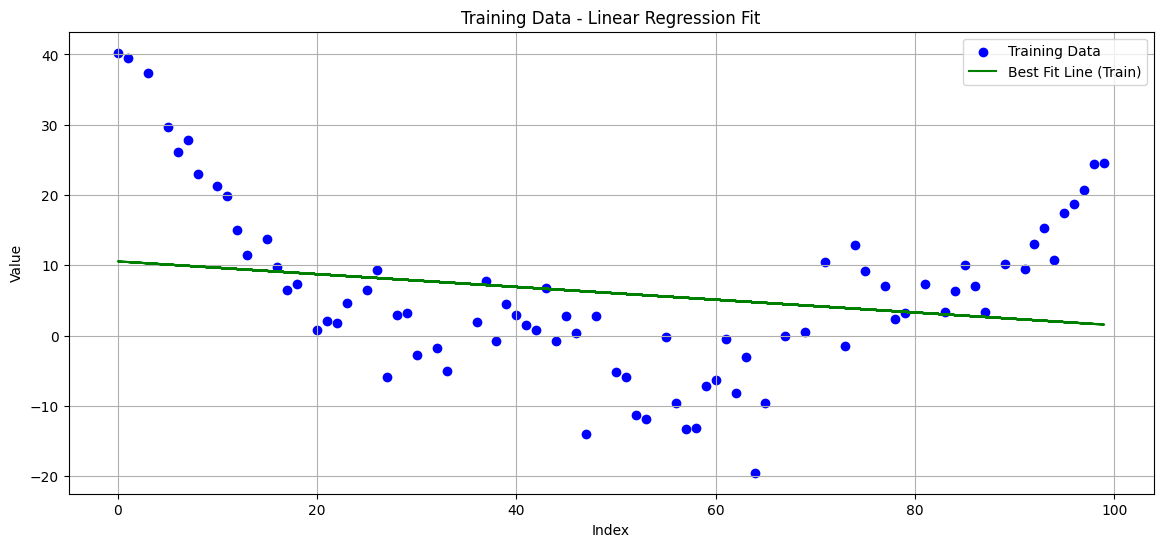

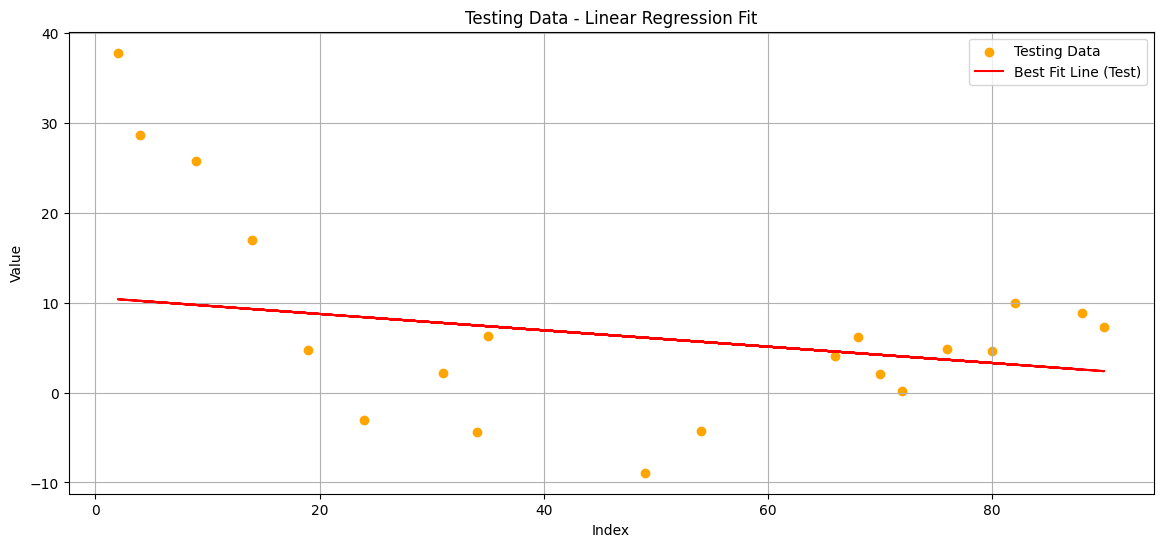

In [ ]:
# Plot Training Data
plt.figure(figsize=(14, 6))
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.plot(X_train, y_train_pred, label='Best Fit Line (Train)', color='green')
plt.title('Training Data - Linear Regression Fit')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot Testing Data
plt.figure(figsize=(14, 6))
plt.scatter(X_test, y_test, label='Testing Data', color='orange')
plt.plot(X_test, y_test_pred, label='Best Fit Line (Test)', color='red')
plt.title('Testing Data - Linear Regression Fit')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()




Error Graphs for Training and Testing Data

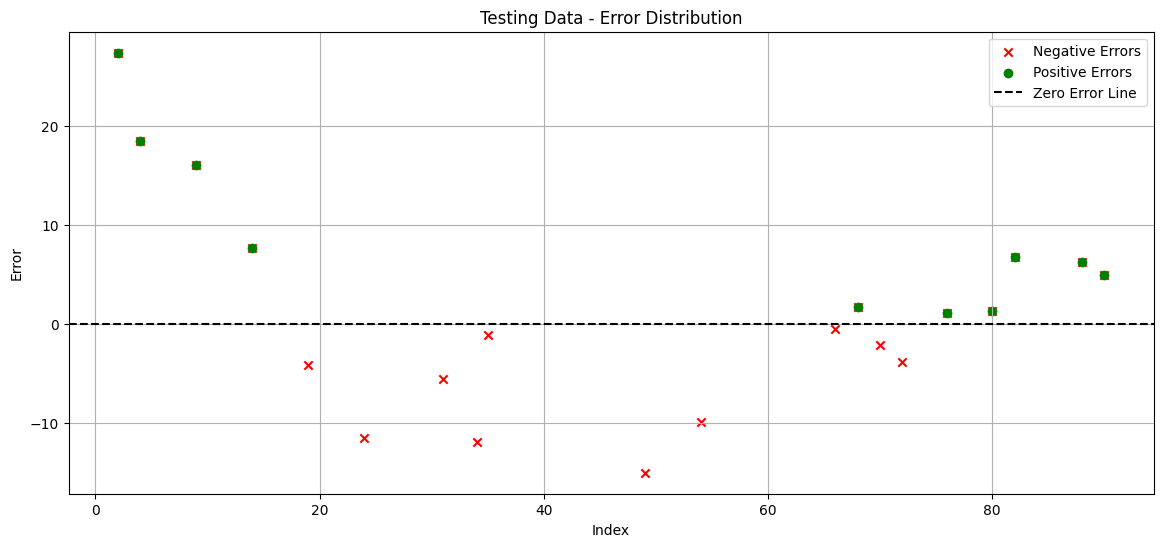

In [ ]:
# Calculate Training and Testing Errors
train_errors = y_train - y_train_pred
test_errors = y_test - y_test_pred

# Plot Training Data Errors
plt.figure(figsize=(14, 6))
plt.scatter(indices_train, train_errors, color='red', label='Negative Errors', marker='x')
plt.scatter(indices_train, [e if e > 0 else None for e in train_errors],
            color='green', label='Positive Errors', marker='o')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Error Line')
plt.title('Training Data - Error Distribution')
plt.xlabel('Index')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot Testing Data Errors
plt.figure(figsize=(14, 6))
plt.scatter(indices_test, test_errors, color='red', label='Negative Errors', marker='x')
plt.scatter(indices_test, [e if e > 0 else None for e in test_errors],
            color='green', label='Positive Errors', marker='o')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Error Line')
plt.title('Testing Data - Error Distribution')
plt.xlabel('Index')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


2.4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Reshape for consistency
X_train = indices_train.reshape(-1, 1)
X_test = indices_test.reshape(-1, 1)
y_train = data_train
y_test = data_test

# Initialize lists to store metrics
training_errors = []
testing_errors = []
training_r2_scores = []
testing_r2_scores = []
training_mae = []
testing_mae = []

# Start iterative training
for i in range(1, len(indices_train) + 1):
    # Select the first 'i' training data points
    X_train_subset = X_train[:i]
    y_train_subset = y_train[:i]

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train_subset, y_train_subset)

    # Make predictions
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test)

    # Calculate Training and Testing Errors (MSE)
    train_error = mean_squared_error(y_train_subset, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    training_errors.append(train_error)
    testing_errors.append(test_error)

    # Calculate Training and Testing R² Scores
    train_r2 = r2_score(y_train_subset, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    training_r2_scores.append(train_r2)
    testing_r2_scores.append(test_r2)

    # Calculate Training and Testing MAE
    train_mae = mean_absolute_error(y_train_subset, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    training_mae.append(train_mae)
    testing_mae.append(test_mae)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


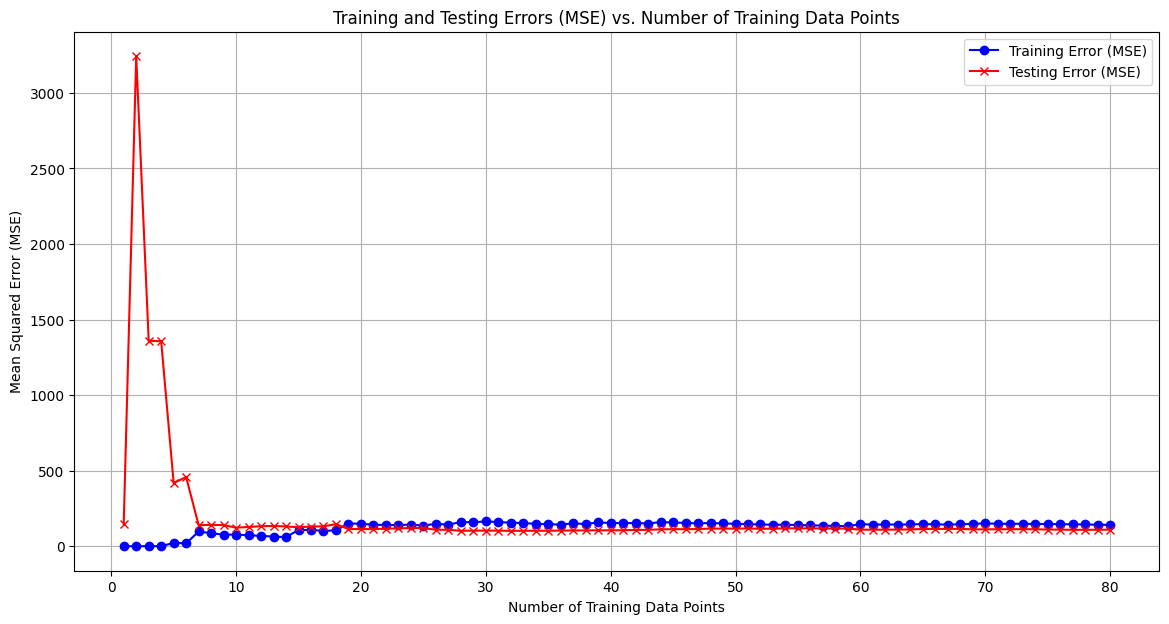

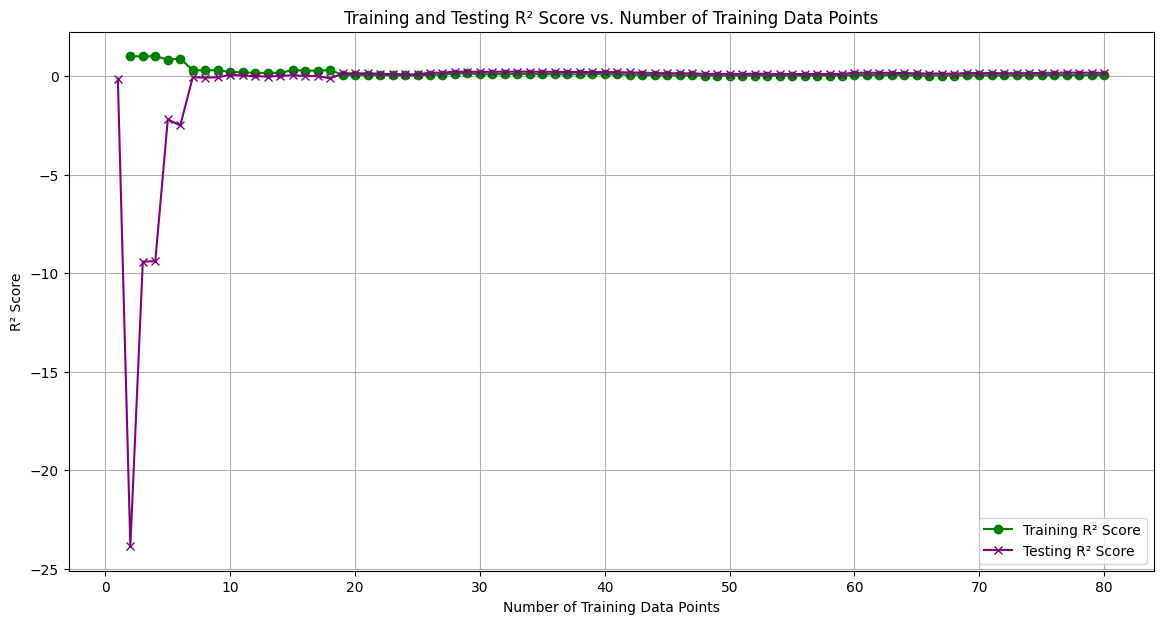

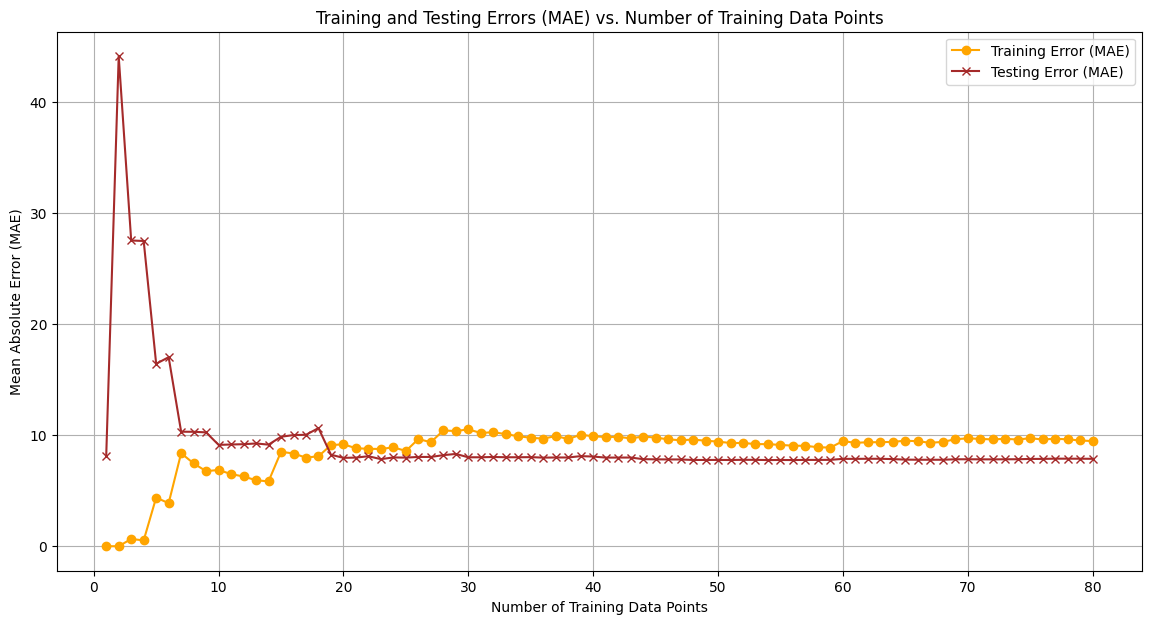

In [ ]:

# Plot Training and Testing Errors (MSE)
plt.figure(figsize=(14, 7))
plt.plot(range(1, len(indices_train) + 1), training_errors, label='Training Error (MSE)', marker='o', color='blue')
plt.plot(range(1, len(indices_train) + 1), testing_errors, label='Testing Error (MSE)', marker='x', color='red')
plt.title('Training and Testing Errors (MSE) vs. Number of Training Data Points')
plt.xlabel('Number of Training Data Points')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Testing R² Scores
plt.figure(figsize=(14, 7))
plt.plot(range(1, len(indices_train) + 1), training_r2_scores, label='Training R² Score', marker='o', color='green')
plt.plot(range(1, len(indices_train) + 1), testing_r2_scores, label='Testing R² Score', marker='x', color='purple')
plt.title('Training and Testing R² Score vs. Number of Training Data Points')
plt.xlabel('Number of Training Data Points')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Testing Errors (MAE)
plt.figure(figsize=(14, 7))
plt.plot(range(1, len(indices_train) + 1), training_mae, label='Training Error (MAE)', marker='o', color='orange')
plt.plot(range(1, len(indices_train) + 1), testing_mae, label='Testing Error (MAE)', marker='x', color='brown')
plt.title('Training and Testing Errors (MAE) vs. Number of Training Data Points')
plt.xlabel('Number of Training Data Points')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

2.5 is answered in the **Report File**

2.6

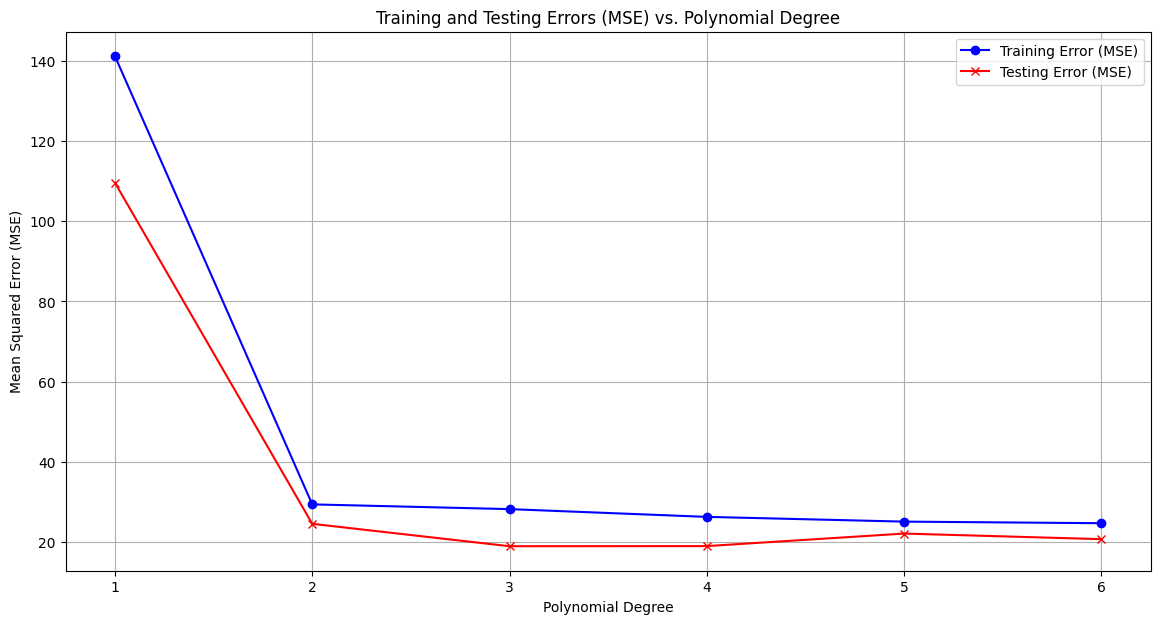

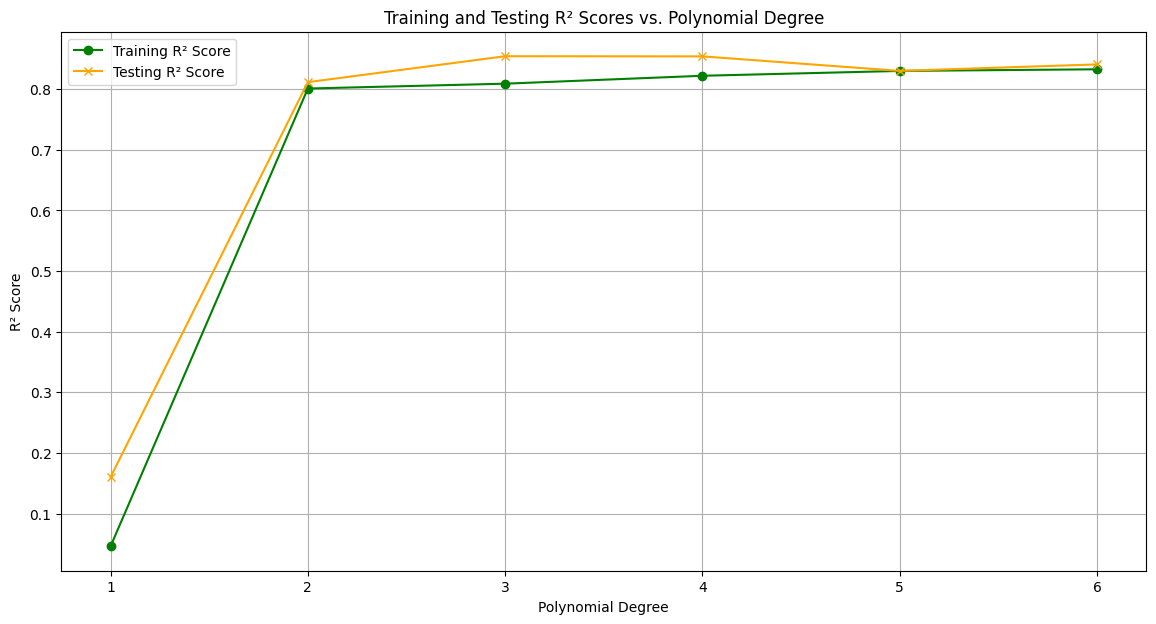

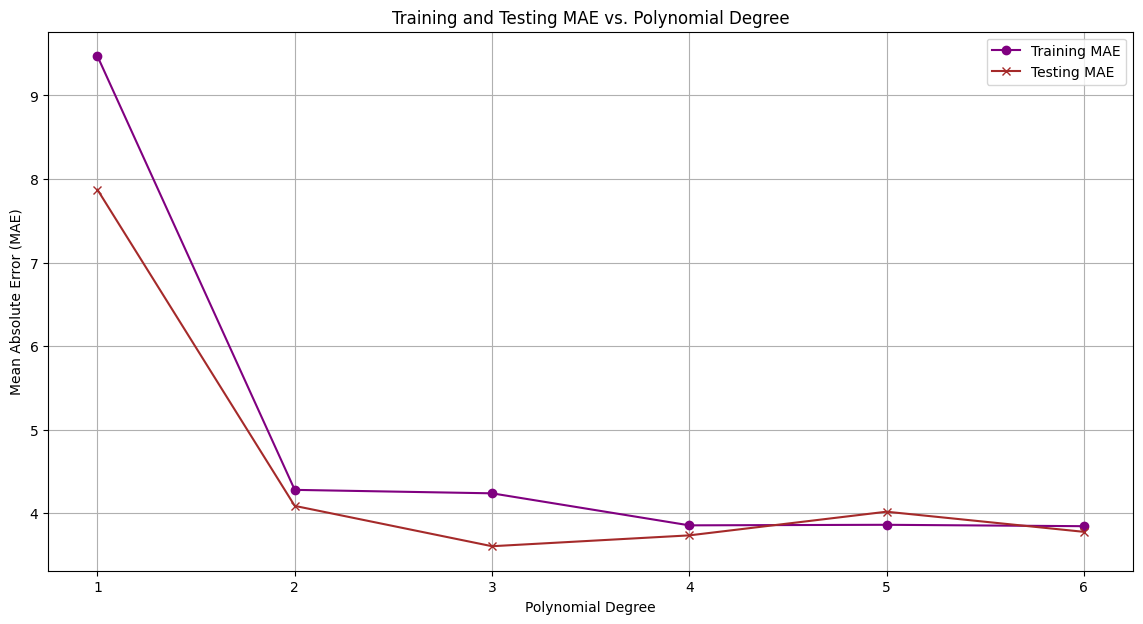

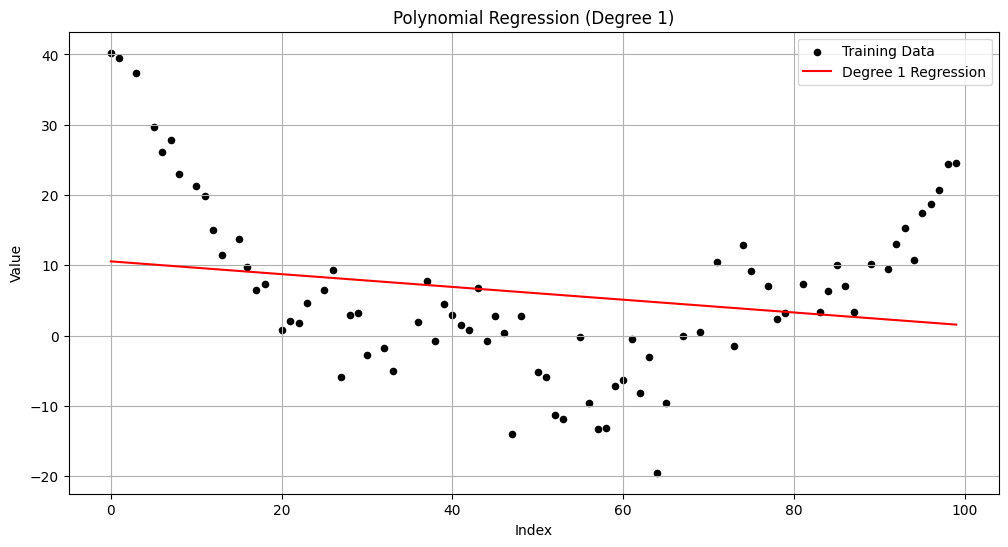

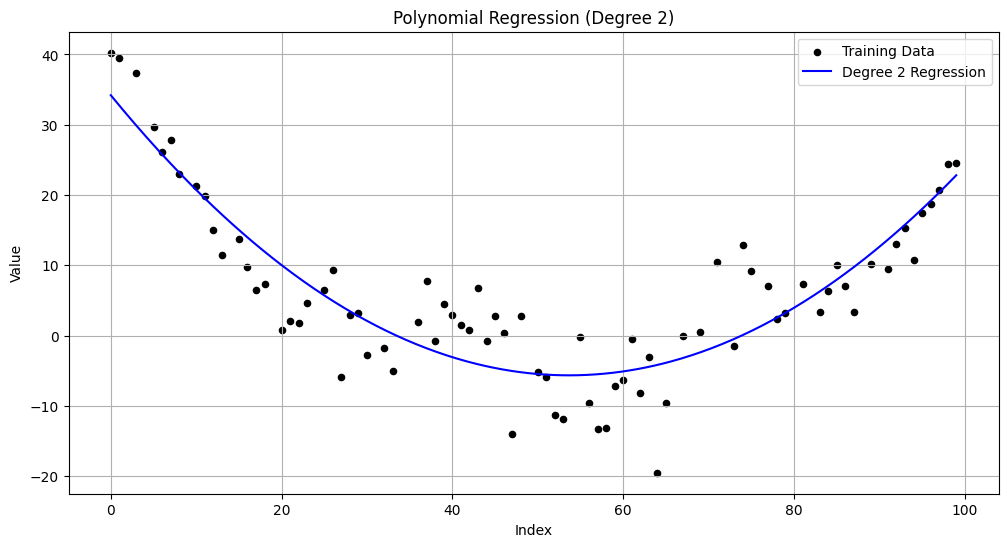

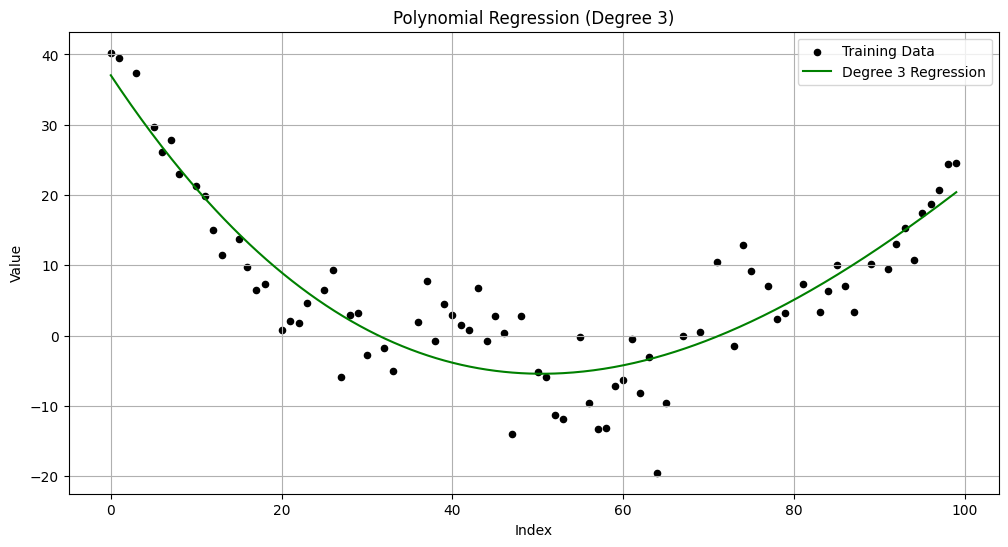

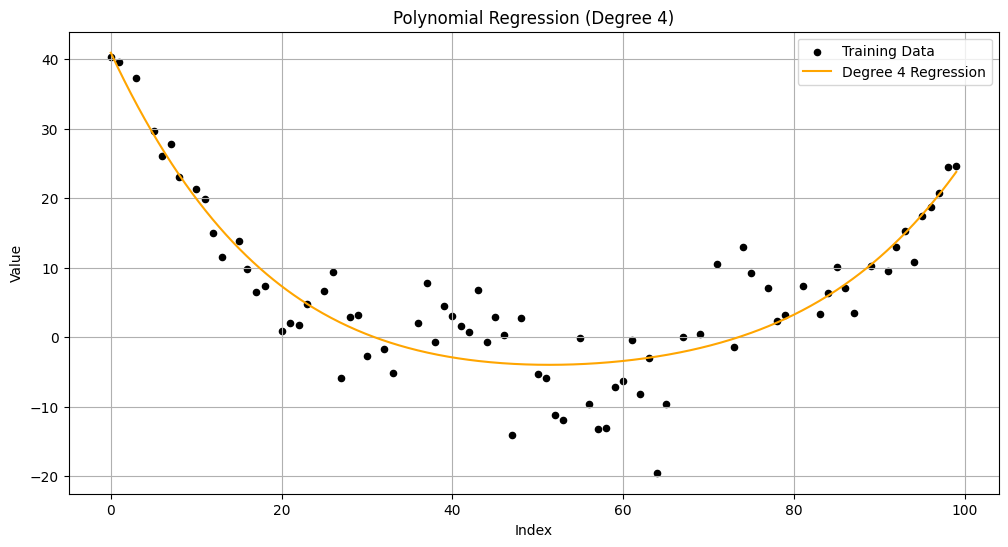

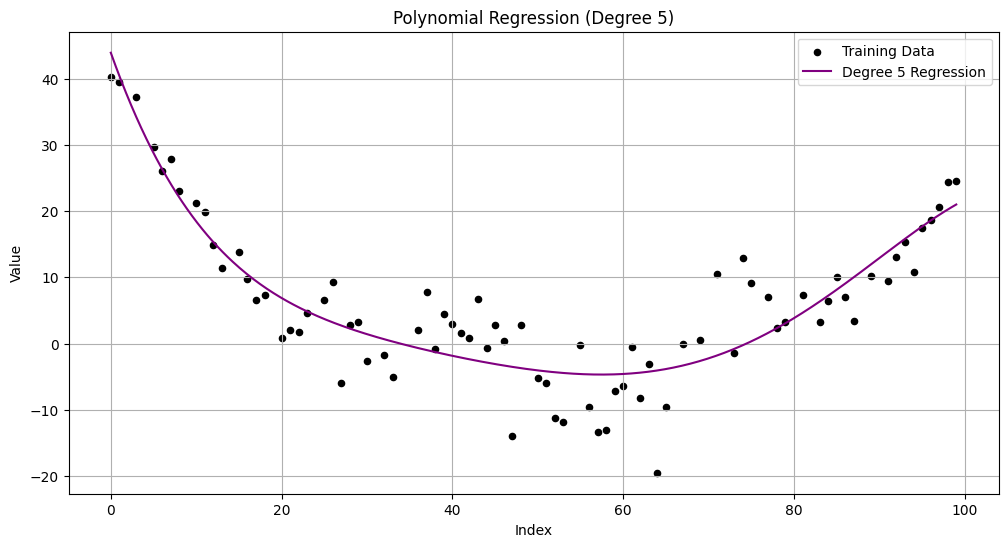

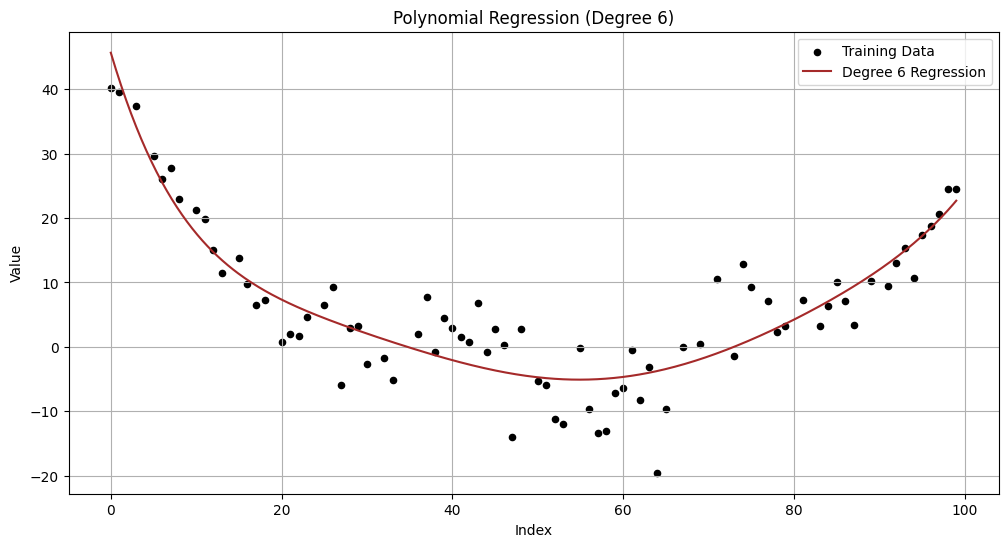

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Reshape for sklearn compatibility
X_train = indices_train.reshape(-1, 1)
X_test = indices_test.reshape(-1, 1)
y_train = data_train
y_test = data_test

# Track errors and scores for each polynomial degree
training_errors = []  # MSE
testing_errors = []   # MSE
training_r2_scores = []
testing_r2_scores = []
training_mae_scores = []
testing_mae_scores = []

# Test polynomial degrees from 1 (linear) to 6
max_degree = 6
degrees = range(1, max_degree + 1)

for degree in degrees:
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate MSE
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Calculate R² Score
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    training_errors.append(train_error)
    testing_errors.append(test_error)
    training_r2_scores.append(train_r2)
    testing_r2_scores.append(test_r2)
    training_mae_scores.append(train_mae)
    testing_mae_scores.append(test_mae)

# Plot Training and Testing Errors (MSE)
plt.figure(figsize=(14, 7))
plt.plot(degrees, training_errors, label='Training Error (MSE)', marker='o', color='blue')
plt.plot(degrees, testing_errors, label='Testing Error (MSE)', marker='x', color='red')
plt.title('Training and Testing Errors (MSE) vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Testing R² Scores
plt.figure(figsize=(14, 7))
plt.plot(degrees, training_r2_scores, label='Training R² Score', marker='o', color='green')
plt.plot(degrees, testing_r2_scores, label='Testing R² Score', marker='x', color='orange')
plt.title('Training and Testing R² Scores vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Testing MAE
plt.figure(figsize=(14, 7))
plt.plot(degrees, training_mae_scores, label='Training MAE', marker='o', color='purple')
plt.plot(degrees, testing_mae_scores, label='Testing MAE', marker='x', color='brown')
plt.title('Training and Testing MAE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Polynomial Regression for each degree
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

for degree, color in zip(range(1, max_degree + 1), colors):
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_smooth_poly = poly.transform(X_smooth)

    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on smooth indices
    y_smooth_pred = model.predict(X_smooth_poly)

    # Plot each degree on a separate graph
    plt.figure(figsize=(12, 6))
    plt.scatter(X_train, y_train, color='black', label='Training Data', s=20)
    plt.plot(X_smooth, y_smooth_pred, label=f'Degree {degree} Regression', color=color)
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


2.7

In [13]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Load the dataset
data = np.load('data.npy')

# Generate indices
indices = np.arange(len(data))

# Split the dataset into training and testing sets
indices_train, indices_test, data_train, data_test = train_test_split(
    indices, data, test_size=0.2, random_state=73
)

# Reshape indices for feature matrix (X) as required by models
X_train = indices_train.reshape(-1, 1)
X_test = indices_test.reshape(-1, 1)
y_train = data_train
y_test = data_test

# Models to train
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector": SVR(kernel='rbf')
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}

# Display results as a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                     MAE        MSE  R2 Score
Decision Tree   5.340080  41.061413  0.685350
Random Forest   4.379229  27.628426  0.788286
Support Vector  5.809459  67.656724  0.481553


Train MSE: 30.6447
Test MSE: 25.6682
Train R²: 0.7929
Test R²: 0.8033
Train MAE: 4.4217
Test MAE: 4.2733


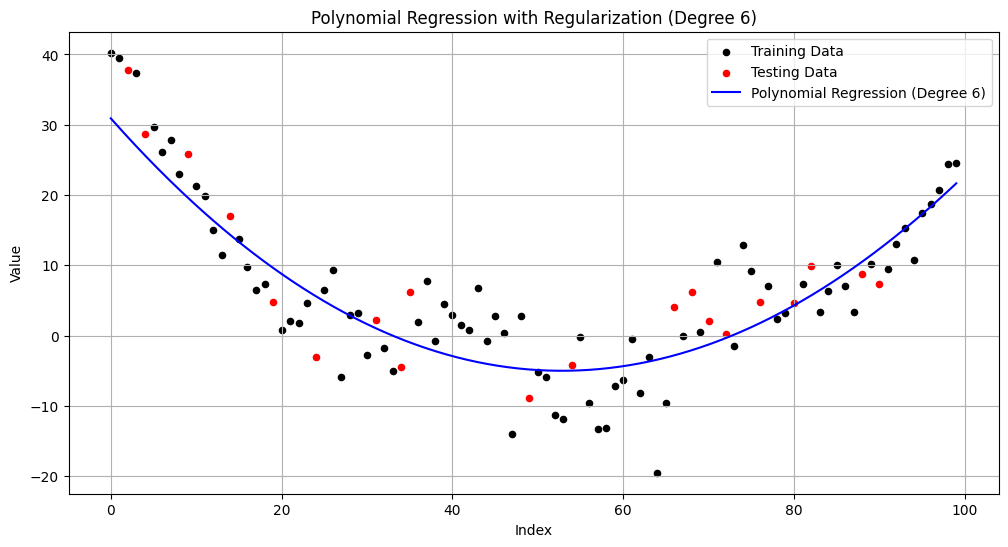

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test, indices_train, indices_test are already defined

# Function to generate polynomial features manually
def generate_polynomial_features(X, degree):
    return np.hstack([X**i for i in range(degree + 1)])

# Ridge Regression function
def ridge_regression(X, y, lambda_reg):
    # Add regularization term to the normal equation
    XTX = X.T @ X
    regularization = lambda_reg * np.eye(X.shape[1])  # Regularization term
    XTy = X.T @ y
    weights = np.linalg.inv(XTX + regularization) @ XTy
    return weights

# Set degree and regularization strength
degree = 6
lambda_reg = 1.0  # Regularization strength

# Generate polynomial features
X_train_poly = generate_polynomial_features(X_train, degree)
X_test_poly = generate_polynomial_features(X_test, degree)

# Train Ridge Regression model
weights = ridge_regression(X_train_poly, y_train, lambda_reg)

# Predict values
y_train_pred = X_train_poly @ weights
y_test_pred = X_test_poly @ weights

# Evaluate the model
train_mse = np.mean((y_train - y_train_pred)**2)
test_mse = np.mean((y_test - y_test_pred)**2)
train_r2 = 1 - (np.sum((y_train - y_train_pred)**2) / np.sum((y_train - np.mean(y_train))**2))
test_r2 = 1 - (np.sum((y_test - y_test_pred)**2) / np.sum((y_test - np.mean(y_test))**2))
train_mae = np.mean(np.abs(y_train - y_train_pred))
test_mae = np.mean(np.abs(y_test - y_test_pred))

# Print metrics
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Visualization
X_smooth = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)
X_smooth_poly = generate_polynomial_features(X_smooth, degree)
y_smooth_pred = X_smooth_poly @ weights

plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='black', label='Training Data', s=20)
plt.scatter(X_test, y_test, color='red', label='Testing Data', s=20)
plt.plot(X_smooth, y_smooth_pred, label=f'Polynomial Regression (Degree {degree})', color='blue')
plt.title(f'Polynomial Regression with Regularization (Degree {degree})')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
